# DataAugumentation

In [1]:
import warnings
from pathlib import Path

import matplotlib.pyplot as plt
from torchvision import transforms

from dataset import MyDataset

warnings.filterwarnings('ignore')

%matplotlib inline
%autoreload 2

# Dataset

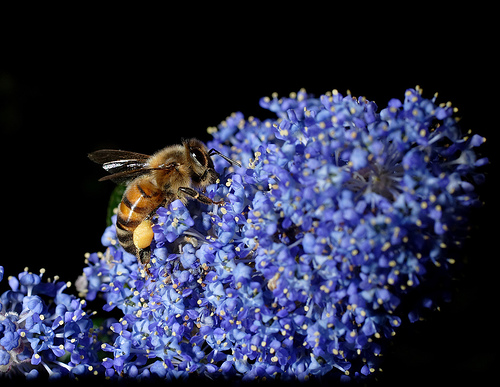

In [2]:
train_path = Path('hymenoptera_data/train')

# わざと空っぽのtransformsを渡している
train_transform = transforms.Compose([])

train_dataset = MyDataset(train_path, train_transform)

idx = 1
image, label = train_dataset[idx]

image

In [3]:
def compare_to_transform(image, transform):
    plt.subplot(1, 2, 1)
    plt.title('RawImage')
    plt.imshow(image)

    image_transformed = transform(image)

    plt.subplot(1, 2, 2)
    plt.title(transform.__class__.__name__)
    plt.imshow(image_transformed)
    plt.show()

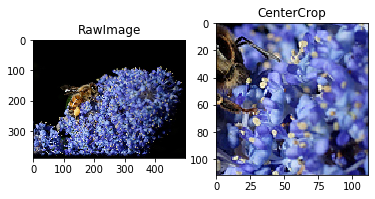

In [4]:
compare_to_transform(image, transform=transforms.CenterCrop(size=(112, 112)))

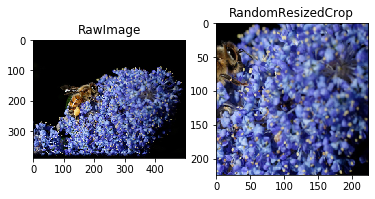

In [5]:
compare_to_transform(
    image, transform=transforms.RandomResizedCrop(size=(224, 224)))

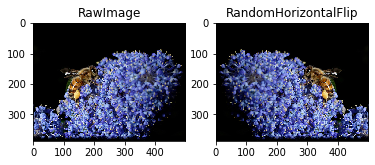

In [6]:
compare_to_transform(image, transform=transforms.RandomHorizontalFlip())

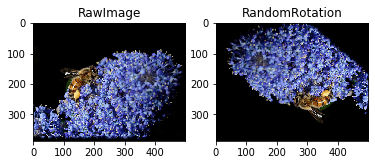

In [7]:
compare_to_transform(
    image, transform=transforms.RandomRotation(degrees=[30, 270]))

In [8]:
compose = transforms.Compose([
    transforms.RandomResizedCrop(size=(224, 224), scale=(0.5, 1.0)),
    transforms.RandomHorizontalFlip()
])
compare_to_transform(image, transform=compose)

In [12]:
# 利用できる命令を確認してみる
# 公式Doc → https://pytorch.org/docs/stable/torchvision/transforms.html
[x for x in dir(transforms) if '__' not in x]

['CenterCrop',
 'ColorJitter',
 'Compose',
 'FiveCrop',
 'Grayscale',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'Pad',
 'RandomAffine',
 'RandomApply',
 'RandomChoice',
 'RandomCrop',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomOrder',
 'RandomPerspective',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'functional',
 'transforms']

# DataAugumentationを可視化で理解しよう
- 実行するたびに取得できる画像が異なる

In [11]:
from torch.utils.data import DataLoader
from torchvision.utils import make_grid

# いくつかのtransformを組み合わせてみる
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(size=(256, 256), scale=(0,1)),
    transforms.RandomRotation(degrees=[30, 270]),
    transforms.ToTensor()
])

train_dataset = MyDataset(train_path, train_transform)

train_loader = DataLoader(train_dataset, batch_size=4)
images, labels = next(iter(train_loader))

out = make_grid(images)
npimg = out.numpy().transpose(1, 2, 0)

plt.imshow(npimg)
plt.show()

おわり